In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../DATA/wellbeing-statistics-2018-csv/wellbeing statistics 2018.csv')
df = df[df['Estimate'] != 'S']

In [3]:
with open('../DATA/pickle_files/CaCodes.pickle', 'rb') as handle:
    CaCodes = pickle.load(handle)

In [4]:
with open('../DATA/pickle_files/VaCodes_Std.pickle', 'rb') as handle:
    VaCodes = pickle.load(handle)

In [5]:
df['CaCode_Decoded'] = df['CACode'].apply(lambda x: CaCodes[x])

In [6]:
df['VaCode_Decoded'] = df['VaCode'].apply(lambda x: VaCodes[x])

In [7]:
df = df[(~df.VaCode_Decoded.str.contains("safety")) & (~df.VaCode_Decoded.str.contains("social")) & 
        (~df.VaCode_Decoded.str.contains("acceptance")) & 
        (~df.VaCode_Decoded.str.contains("security")) & 
       (~df.VaCode_Decoded.str.contains("express"))]

In [8]:
df.describe()

,ASE
count,4741.000000
mean,2.551888
std,2.311434
min,0.000000
25%,1.200000
50%,2.100000
75%,3.300000
max,16.800000


In [9]:
new_va = df["VaCode_Decoded"].str.split(":", n = 1, expand = True) 
df['VaCodeVariable'] = new_va[0]
df['VaCodeCategory'] = new_va[1]

In [10]:
new_ca = df["CaCode_Decoded"].str.split(":", n = 1, expand = True) 
df['CaCodeVariable'] = new_ca[0]
df['CaCodeCategory'] = new_ca[1]

In [11]:
df.drop(columns=['CACode', 'VaCode', 'ASE', 'Flag', 'CaCode_Decoded', 'VaCode_Decoded'], axis=1, inplace=True)

In [12]:
df['Estimate'] = pd.to_numeric(df['Estimate'])

In [13]:
df['CaCodeVariable'] = df['CaCodeVariable'].str.replace("none", "total")

In [14]:
df = df[df.VaCodeCategory != 'mean_rating'] #we dont need the mean_rating variables, because we can calculate it ourselves

In [15]:
df.head()

,Estimate,VaCodeVariable,VaCodeCategory,CaCodeVariable,CaCodeCategory
0,18.9,overall_life_satisfaction,0_to_6,total,variable_value_totals
1,19.0,overall_life_satisfaction,7,total,variable_value_totals
2,30.3,overall_life_satisfaction,8,total,variable_value_totals
3,14.9,overall_life_satisfaction,9,total,variable_value_totals
4,17.0,overall_life_satisfaction,10,total,variable_value_totals


In [16]:
rankings = {
    -1: ['crossvariable_value_totals_-_demographic_sub_totals'],
    'poor': ['0_to_6', '7', 'not_enough_money', 'fair/poor', 'most/all_of_the_time', '0_to_4'],
    'good': ['8', 'only_just_enough_money', 'good', 'some_of_the_time', '5_to_6'],
    'very good': ['9', 'enough_money', 'very_good', 'a_little_of_the_time', '7_to_8'],
    'excellent': ['10', 'more_than_enough_money','excellent', 'none_of_the_time', '9_to_10']
}

def get_key(x):
    for k,v in rankings.items():
        if x in v:
            return k

In [17]:
df['rankings'] = df['VaCodeCategory'].apply(lambda x: get_key(x))

In [18]:
df['rankings'] = pd.Categorical(df['rankings'])

In [19]:
df.to_pickle('wellbeing_df.pickle')

In [20]:
life_satisfaction_identity = df[(df.VaCodeVariable == 'overall_life_satisfaction') & (df.CaCodeVariable == 'sexual_identity')]

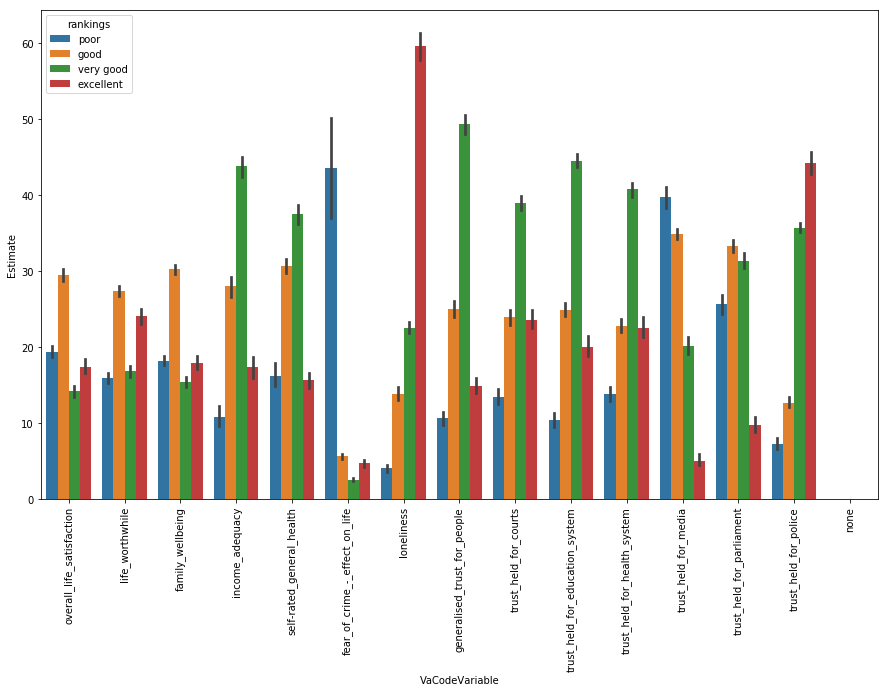

In [21]:
f, ax = plt.subplots(figsize=(15, 9))
g = sns.barplot(x='VaCodeVariable', y="Estimate", hue='rankings', data=df, hue_order=['poor', 'good', 'very good', 'excellent'])
plt.xticks(rotation=90)
plt.show()

In [22]:
test = df.pivot_table('Estimate', ['VaCodeVariable', 'CaCodeVariable', 'CaCodeCategory'], 'rankings')

In [23]:
new_test = test.T

In [24]:
fm = new_test['family_wellbeing']['household_income']

In [25]:
fm

CaCodeCategory,"$100,001–$150,000","$150,001_or_more","$30,000_or_less","$30,001–$70,000","$70,001–$100,000"
rankings,,,,,
-1,NaN,NaN,NaN,NaN,NaN
excellent,13.2,19.60,23.4,20.4,14.50
good,35.0,32.70,25.0,28.0,30.20
poor,17.7,14.55,19.8,18.3,19.95
very good,16.4,18.60,12.0,15.0,15.40


In [31]:
new_test.columns

MultiIndex(levels=[['family_wellbeing', 'fear_of_crime_-_effect_on_life', 'generalised_trust_for_people', 'income_adequacy', 'life_worthwhile', 'loneliness', 'none', 'overall_life_satisfaction', 'self-rated_general_health', 'trust_held_for_courts', 'trust_held_for_education_system', 'trust_held_for_health_system', 'trust_held_for_media', 'trust_held_for_parliament', 'trust_held_for_police'], ['age_group', 'disability_status', 'ethnicity', 'family_type', 'highest_qualification', 'household_income', 'housing_tenure', 'labour_force_status', 'lifestage', 'migrant_status', 'personal_income', 'region', 'sex', 'sexual_identity', 'total', 'urban_/_rural'], ['$100,001–$150,000', '$150,001_or_more', '$30,000_or_less', '$30,001–$70,000', '$70,001_or_more', '$70,001–$100,000', '15–24', '25–34', '25–44', '35–44', '45–54', '45–64', '55–64', '65+', '65–74', '75+', 'asian', 'auckland', 'bay_of_plenty', 'bisexual', 'born_in_nz', 'canterbury', 'couple_with_child(ren)', 'couple_without_child(ren)', 'disa

In [41]:
new_test['family_wellbeing']['region']

CaCodeCategory,auckland,bay_of_plenty,canterbury,gisborne_/_hawkes_bay,manawatu_/_whanganui,nelson/tasman/marlborough/west_coast,northland,otago,southland,taranaki,waikato,wellington
rankings,,,,,,,,,,,,
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
excellent,16.7,15.60,17.3,18.40,17.2,18.2,18.4,16.20,21.3,20.50,21.40,18.00
good,33.7,29.40,30.8,26.30,26.8,32.7,30.4,33.90,28.8,23.10,28.80,29.80
poor,16.5,21.25,17.7,18.95,20.7,15.1,20.7,17.15,15.7,17.35,17.15,18.35
very good,16.6,12.50,16.5,17.40,14.6,18.9,9.9,15.70,18.5,21.70,15.50,15.50
